# Notebook de Comparação de Encodings

## Imports

In [16]:
import sys
sys.path.insert(0, '..')

import numpy as np
import matplotlib.pyplot as plt
from time import time

from src.data import DataLoader, DataPreprocessor
from src.algorithms import GeneticAlgorithm, MatrixGeneticAlgorithm
from src.fitness import create_fitness_function
from src.encoding import (
    BinaryEncoding,
    DecimalEncoding,
    RealEncoding,
    GaussianEncoding,
    AdaptiveEncoding
)

## Testes

In [17]:
loader = DataLoader(data_root="../data/raw")
X_train, y_train, X_test, y_test = loader.load_colon()

preprocessor = DataPreprocessor(normalization='standard')
X_train_norm, X_test_norm = preprocessor.fit_transform(X_train, X_test)

n_features = X_train_norm.shape[1]
print(f"Dataset: Colon")
print(f"Train: {X_train_norm.shape}, Test: {X_test_norm.shape}")
print(f"Features: {n_features}")

Carregando conjunto de dados de microarray: COLON-TUMOR
Formato Elvira detectado
Parseando arquivo Elvira: colonTumor.dbc
Número de casos esperados: 62
Encontrados 2001 nós/variáveis
Nó de label: SampleType
Estados do label: ['positive', 'negative']
Extraídos 62 casos
Mapeamento de labels: {'positive': 0, 'negative': 1}
Matriz de dados: X=(62, 2000), y=(62,)
Classes únicas em y: [0 1] (distribuição: [22 40])
Conjunto de dados COLON-TUMOR carregado com sucesso. X_train: (43, 2000), X_test: (19, 2000)
Features: 2000, Samples: 62, Classes: 2
Dados normalizados com standard
Shape: (43, 2000), Min: -1.9836, Max: 6.2386
Dataset: Colon
Train: (43, 2000), Test: (19, 2000)
Features: 2000


In [18]:
encodings = {
    'Binary': BinaryEncoding(n_features),
    'Decimal': DecimalEncoding(n_features, max_value=10, threshold=0.5, initial_feature_ratio=0.1),
    'Real': RealEncoding(n_features, threshold=0.5, initial_feature_ratio=0.1),
    'Gaussian': GaussianEncoding(n_features, mean=0.5, std=0.2, threshold=0.5, initial_feature_ratio=0.1),
    'Adaptive': AdaptiveEncoding(n_features, initial_threshold=0.5, learning_rate=0.01, initial_feature_ratio=0.1)
}

print("Teste de inicialização e decodificação:\n")
for name, enc in encodings.items():
    chrom = enc.initialize_chromosome()
    decoded = enc.decode(chrom)
    n_selected = np.sum(decoded)
    print(f"{name:12s}: chromosome shape={chrom.shape}, dtype={chrom.dtype}, selected={n_selected}/{n_features}")

Teste de inicialização e decodificação:

Binary      : chromosome shape=(2000,), dtype=int64, selected=181/2000
Decimal     : chromosome shape=(2000,), dtype=int64, selected=257/2000
Real        : chromosome shape=(2000,), dtype=float64, selected=118/2000
Gaussian    : chromosome shape=(2000,), dtype=float64, selected=324/2000
Adaptive    : chromosome shape=(2000,), dtype=float64, selected=375/2000


In [19]:
print("Teste de operadores genéticos:\n")
for name, enc in encodings.items():
    p1 = enc.initialize_chromosome()
    p2 = enc.initialize_chromosome()
    
    o1, o2 = enc.crossover(p1, p2)
    mutated = enc.mutate(o1, mutation_rate=0.2)
    
    print(f"{name:12s}: crossover OK, mutation OK")

Teste de operadores genéticos:

Binary      : crossover OK, mutation OK
Decimal     : crossover OK, mutation OK
Real        : crossover OK, mutation OK
Gaussian    : crossover OK, mutation OK
Adaptive    : crossover OK, mutation OK


In [ ]:
GA_PARAMS = {
    'population_size': 100, 
    'generations': 20,      
    'crossover_rate': 1.0,
    'mutation_rate': 0.2,
    'tournament_size': 3,
    'elitism': 2,
}

results = {}
PENALTY_WEIGHT = 0.01

In [21]:
print("Testando com Binary Encoding")

enc_binary = BinaryEncoding(n_features)
fitness_binary = create_fitness_function(
    X_train_norm, y_train, X_test_norm, y_test,
    k=7, encoding=enc_binary,
    penalty_weight=PENALTY_WEIGHT
)

ga_binary = GeneticAlgorithm(**GA_PARAMS, encoding=enc_binary)
start = time()
ga_binary.fit(n_features, fitness_binary, verbose=True)
elapsed = time() - start

results['Binary'] = {
    'fitness': ga_binary.best_fitness,
    'n_features': len(ga_binary.get_selected_features()),
    'time': elapsed,
    'history': ga_binary.get_fitness_history()
}

Testando com Binary Encoding
Geração 0: Fitness=0.6311, Features=103/2000
Geração 10: Fitness=0.6311, Features=103/2000

Finalizado: Fitness=0.6311, Features=103/2000


In [22]:
print("Testando com Decimal Encoding")

enc_decimal = DecimalEncoding(n_features, max_value=10, threshold=0.5)
fitness_decimal = create_fitness_function(
    X_train_norm, y_train, X_test_norm, y_test,
    k=7, encoding=enc_decimal,
    penalty_weight=PENALTY_WEIGHT
)

ga_decimal = GeneticAlgorithm(**GA_PARAMS, encoding=enc_decimal)
start = time()
ga_decimal.fit(n_features, fitness_decimal, verbose=True)
elapsed = time() - start

results['Decimal'] = {
    'fitness': ga_decimal.best_fitness,
    'n_features': len(ga_decimal.get_selected_features()),
    'time': elapsed,
    'history': ga_decimal.get_fitness_history()
}

Testando com Decimal Encoding
Geração 0: Fitness=0.6311, Features=105/2000
Geração 10: Fitness=0.6311, Features=105/2000

Finalizado: Fitness=0.6311, Features=105/2000


In [23]:
print("Testando com Real Encoding")

enc_real = RealEncoding(n_features, threshold=0.5)
fitness_real = create_fitness_function(
    X_train_norm, y_train, X_test_norm, y_test,
    k=7, encoding=enc_real,
    penalty_weight=PENALTY_WEIGHT
)

ga_real = GeneticAlgorithm(**GA_PARAMS, encoding=enc_real)
start = time()
ga_real.fit(n_features, fitness_real, verbose=True)
elapsed = time() - start

results['Real'] = {
    'fitness': ga_real.best_fitness,
    'n_features': len(ga_real.get_selected_features()),
    'time': elapsed,
    'history': ga_real.get_fitness_history()
}

Testando com Real Encoding
Geração 0: Fitness=0.6310, Features=106/2000
Geração 10: Fitness=0.6310, Features=106/2000

Finalizado: Fitness=0.6310, Features=106/2000


In [24]:
print("Testando com Gaussian Encoding")

enc_gaussian = GaussianEncoding(n_features, mean=0.5, std=0.2, threshold=0.5)
fitness_gaussian = create_fitness_function(
    X_train_norm, y_train, X_test_norm, y_test,
    k=7, encoding=enc_gaussian,
    penalty_weight=PENALTY_WEIGHT
)

ga_gaussian = GeneticAlgorithm(**GA_PARAMS, encoding=enc_gaussian)
start = time()
ga_gaussian.fit(n_features, fitness_gaussian, verbose=True)
elapsed = time() - start

results['Gaussian'] = {
    'fitness': ga_gaussian.best_fitness,
    'n_features': len(ga_gaussian.get_selected_features()),
    'time': elapsed,
    'history': ga_gaussian.get_fitness_history()
}

Testando com Gaussian Encoding
Geração 0: Fitness=0.6310, Features=110/2000
Geração 10: Fitness=0.8947, Features=11/2000

Finalizado: Fitness=0.9473, Features=9/2000


In [25]:
print("Testando com Adaptive Encoding")

enc_adaptive = AdaptiveEncoding(
    n_features, 
    initial_threshold=0.5, 
    learning_rate=0.01,
    min_threshold=0.1,
    max_threshold=0.9
)
fitness_adaptive = create_fitness_function(
    X_train_norm, y_train, X_test_norm, y_test,
    k=7, encoding=enc_adaptive,
    penalty_weight=PENALTY_WEIGHT
)

ga_adaptive = GeneticAlgorithm(**GA_PARAMS, encoding=enc_adaptive)
start = time()
ga_adaptive.fit(n_features, fitness_adaptive, verbose=True)
elapsed = time() - start

results['Adaptive'] = {
    'fitness': ga_adaptive.best_fitness,
    'n_features': len(ga_adaptive.get_selected_features()),
    'time': elapsed,
    'history': ga_adaptive.get_fitness_history(),
    'threshold_history': enc_adaptive.get_threshold_history(),
    'stats': enc_adaptive.get_stats()
}

print(f"\nAdaptive Stats: {enc_adaptive.get_stats()}")

Testando com Adaptive Encoding
Geração 0: Fitness=0.6311, Features=100/2000, Threshold=0.495
Geração 10: Fitness=0.6312, Features=65/2000, Threshold=0.615

Finalizado: Fitness=0.6314, Features=35/2000

Adaptive Stats: {'current_threshold': np.float64(0.7150000000000002), 'best_fitness': np.float64(0.6310789473684211), 'n_updates': 20, 'threshold_range': (np.float64(0.495), np.float64(0.7150000000000002)), 'stagnation_counter': 4}


In [26]:
print("Resumo Comparativo")
print(f"{'Encoding':<12} {'Accuracy':<12} {'Features':<12} {'Tempo (s)':<12}")
print("-"*70)

for name, res in results.items():
    print(f"{name:<12} {res['fitness']:<12.4f} {res['n_features']:<12} {res['time']:<12.2f}")

print("-"*70)
print(f"\nPaper (Colon): 95.6% accuracy")

Resumo Comparativo
Encoding     Accuracy     Features     Tempo (s)   
----------------------------------------------------------------------
Binary       0.6311       103          5.36        
Decimal      0.6311       105          9.86        
Real         0.6310       106          6.76        
Gaussian     0.9473       9            6.55        
Adaptive     0.6314       35           6.67        
----------------------------------------------------------------------

Paper (Colon): 95.6% accuracy


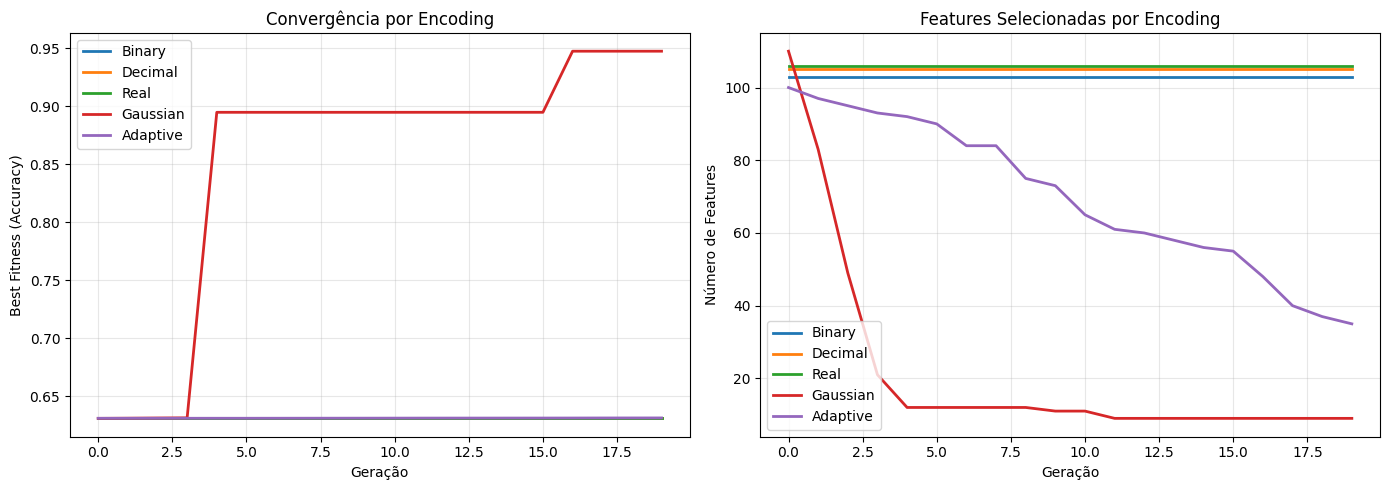

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

ax1 = axes[0]
for name, res in results.items():
    generations = [h['generation'] for h in res['history']]
    fitness = [h['best_fitness'] for h in res['history']]
    ax1.plot(generations, fitness, label=name, linewidth=2)

ax1.set_xlabel('Geração')
ax1.set_ylabel('Best Fitness (Accuracy)')
ax1.set_title('Convergência por Encoding')
ax1.legend()
ax1.grid(True, alpha=0.3)

ax2 = axes[1]
for name, res in results.items():
    generations = [h['generation'] for h in res['history']]
    n_feat = [h['n_features_best'] for h in res['history']]
    ax2.plot(generations, n_feat, label=name, linewidth=2)

ax2.set_xlabel('Geração')
ax2.set_ylabel('Número de Features')
ax2.set_title('Features Selecionadas por Encoding')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../results/figures/encoding_comparison.png', dpi=150)
plt.show()

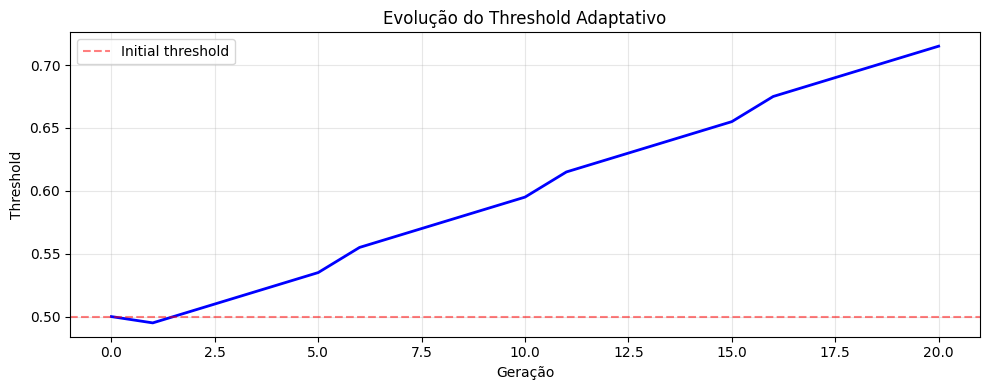

In [28]:
if 'threshold_history' in results['Adaptive']:
    fig, ax = plt.subplots(figsize=(10, 4))
    
    threshold_hist = results['Adaptive']['threshold_history']
    ax.plot(threshold_hist, 'b-', linewidth=2)
    ax.axhline(y=0.5, color='r', linestyle='--', alpha=0.5, label='Initial threshold')
    
    ax.set_xlabel('Geração')
    ax.set_ylabel('Threshold')
    ax.set_title('Evolução do Threshold Adaptativo')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('../results/figures/adaptive_threshold_evolution.png', dpi=150)
    plt.show()

In [29]:
print("Juntando Matrix GA com Adaptive Encoding")

enc_adaptive_mga = AdaptiveEncoding(
    n_features, 
    initial_threshold=0.5, 
    learning_rate=0.01
)
fitness_adaptive_mga = create_fitness_function(
    X_train_norm, y_train, X_test_norm, y_test,
    k=7, encoding=enc_adaptive_mga,
    penalty_weight=PENALTY_WEIGHT
)

mga_adaptive = MatrixGeneticAlgorithm(
    population_size=100,
    generations=20,
    crossover_rate=1.0,
    mutation_rate=0.2,
    encoding=enc_adaptive_mga
)

start = time()
mga_adaptive.fit(n_features, fitness_adaptive_mga, verbose=True)
elapsed = time() - start

print(f"\nMatrix GA + Adaptive:")
print(f"  Fitness: {mga_adaptive.best_fitness:.4f}")
print(f"  Features: {len(mga_adaptive.get_selected_features())}")
print(f"  Tempo: {elapsed:.2f}s")
print(f"  Stats: {enc_adaptive_mga.get_stats()}")

Juntando Matrix GA com Adaptive Encoding
Geração 0: Fitness=0.6311, Features=101/2000, Threshold=0.495
Geração 10: Fitness=0.6313, Features=55/2000, Threshold=0.615

Finalizado: Fitness=0.7367, Features=35/2000

Matrix GA + Adaptive:
  Fitness: 0.7367
  Features: 35
  Tempo: 6.74s
  Stats: {'current_threshold': np.float64(0.7000000000000002), 'best_fitness': np.float64(0.7365771052631579), 'n_updates': 20, 'threshold_range': (np.float64(0.495), np.float64(0.7000000000000002)), 'stagnation_counter': 1}


In [30]:
print("Validaçåo da Integração")

checks = [
    ("Binary encoding funciona", results['Binary']['fitness'] > 0),
    ("Decimal encoding funciona", results['Decimal']['fitness'] > 0),
    ("Real encoding funciona", results['Real']['fitness'] > 0),
    ("Gaussian encoding funciona", results['Gaussian']['fitness'] > 0),
    ("Adaptive encoding funciona", results['Adaptive']['fitness'] > 0),
    ("Adaptive threshold atualiza", len(results['Adaptive']['threshold_history']) > 1),
    ("Matrix GA + Adaptive funciona", mga_adaptive.best_fitness > 0),
    ("Todos atingem >80% accuracy", all(r['fitness'] > 0.8 for r in results.values())),
]

all_passed = True
for desc, passed in checks:
    status = "✓" if passed else "✗"
    print(f"  {status} {desc}")
    if not passed:
        all_passed = False

print("\n" + ("Todos os testes passaram!" if all_passed else "Alguns testes falharam."))

Validaçåo da Integração
  ✓ Binary encoding funciona
  ✓ Decimal encoding funciona
  ✓ Real encoding funciona
  ✓ Gaussian encoding funciona
  ✓ Adaptive encoding funciona
  ✓ Adaptive threshold atualiza
  ✓ Matrix GA + Adaptive funciona
  ✗ Todos atingem >80% accuracy

Alguns testes falharam.
